In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **데이터 불러오기**

In [ ]:
path = '/content/drive/MyDrive/1. 서강대/open'
train = path + '/train.csv'
test = path + '/test.csv'

In [ ]:
import pandas as pd

train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [ ]:
train_df.tail()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.1,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
train_df.describe()

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,598.000000,598.000000,349.000000,349.000000,349.0,349.0,349.000000,349.0,349.000000,349.000000,...,100.000000,100.00000,100.000000,100.000000,100.00000,99.0,0.0,0.0,0.0,0.0
mean,1.025084,0.530896,2.409742,95.123209,0.0,45.0,10.392550,0.0,48.802292,10.048711,...,50.807300,53.60770,49.606200,51.659800,66.64970,1.0,NaN,NaN,NaN,NaN
std,0.565069,0.007401,5.895256,4.107640,0.0,0.0,0.489019,0.0,4.373824,0.215571,...,7.011828,8.13899,7.158917,8.913065,4.52781,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.500856,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,32.120000,31.70000,32.560000,30.490000,61.67000,1.0,NaN,NaN,NaN,NaN
25%,1.000000,0.527535,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,49.485000,52.20000,42.160000,49.915000,63.64500,1.0,NaN,NaN,NaN,NaN
50%,1.000000,0.530436,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,...,53.425000,55.92500,51.460000,56.175000,65.14000,1.0,NaN,NaN,NaN,NaN
75%,1.000000,0.533433,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,...,55.287500,58.97500,55.030000,57.175000,67.11500,1.0,NaN,NaN,NaN,NaN
max,2.000000,0.578841,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,...,60.240000,68.66000,60.410000,59.930000,79.75000,1.0,NaN,NaN,NaN,NaN


# **결측치 처리**
1. 제거
2. 채우기 (보간)
- 평균화 : 평균(mean), 중앙값(median), 모드(mode)
- 예측 기법

https://blog.naver.com/youji4ever/221791455668 


## **결측치 시각화**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

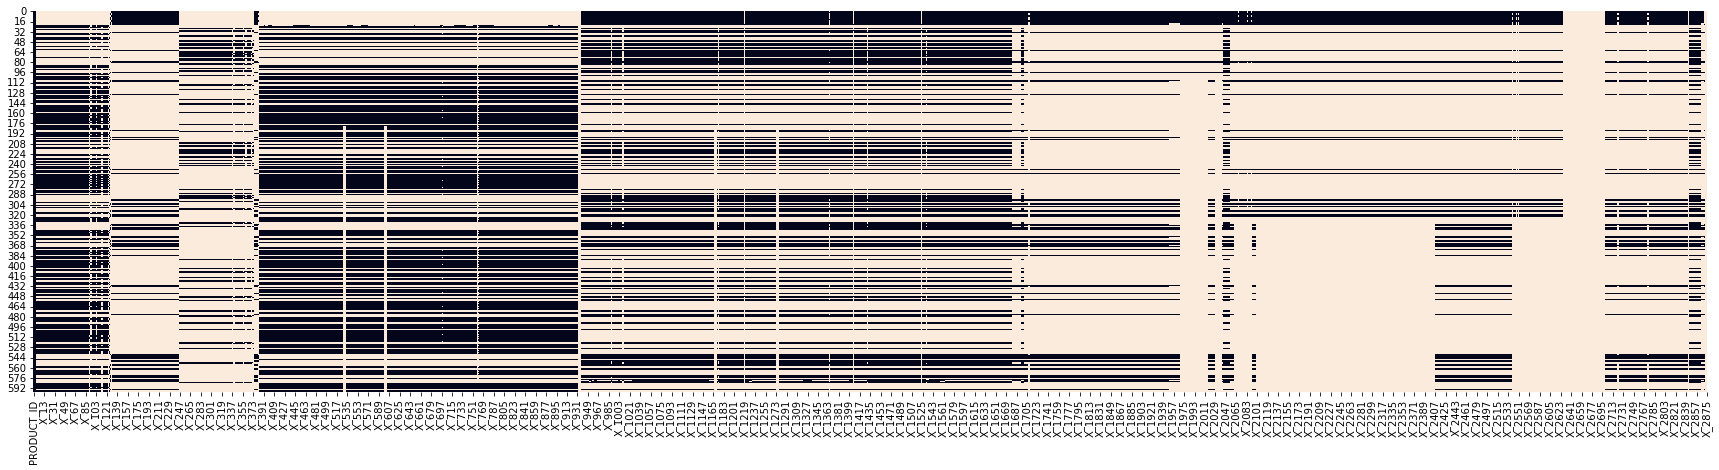

In [ ]:
%matplotlib inline
plt.figure(figsize=(30,7))
sns.heatmap(train_df.isnull(), cbar=False)

## **0으로 보간**

In [ ]:
train_data = train_df.fillna(0)
test_data = test_df.fillna(0)

In [ ]:
train_data.tail()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,0.0,0.0,0.0,0.0,...,49.47,53.07,50.89,55.1,66.49,1.0,0.0,0.0,0.0,0.0
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0


# **X, Y Split**

In [ ]:
df = train_data.drop(['PRODUCT_ID','Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE'], axis=1)
dfX = df.drop(['Y_Class'], axis=1)
dfy = pd.DataFrame(df, columns=['Y_Class']) # 종속 변수로 DLQ 설정
print(dfX.shape, dfy.shape)

(598, 2875) (598, 1)


In [ ]:
dfy.value_counts()

Y_Class
1          407
2          103
0           88
dtype: int64

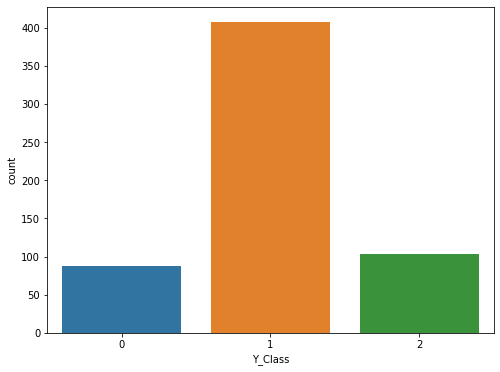

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='Y_Class', data=dfy)
plt.show()

# **Train,Test split**

In [ ]:
X_train = dfX
y_train = dfy

In [ ]:
X_test = test_data.drop(['PRODUCT_ID','TIMESTAMP','LINE','PRODUCT_CODE'], axis=1)

# **중요도**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

X_718     0.233465
X_1945    0.097528
X_242     0.093066
X_368     0.074061
X_248     0.072251
X_1569    0.069137
X_1743    0.068127
X_120     0.055827
X_1480    0.050461
X_1428    0.043322
X_530     0.037568
X_960     0.024646
X_516     0.023669
X_73      0.023382
X_725     0.020076
X_1019    0.013414
X_1919    0.000000
X_1924    0.000000
X_1925    0.000000
X_1926    0.000000
dtype: float64


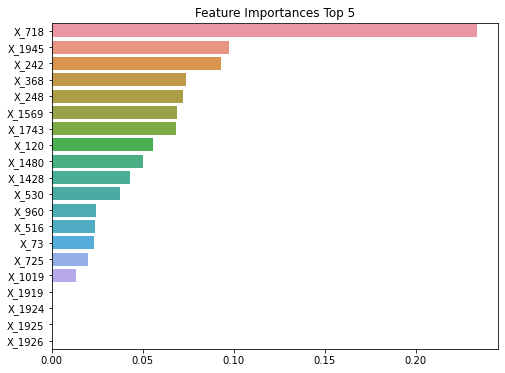

In [ ]:
# Feature Importance
feature_importance_values = dt.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=dfX.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:20] # 10개 혹은 20개 등 개수를 바꾸고 싶다면 이 부분을 변경
feature_top = feature_importances.sort_values(ascending=False)[:]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

print(feature_top5)

# **Train**

In [ ]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
x_train , x_test , y_train , y_test = train_test_split(X_train , y_train , test_size=0.2, shuffle=True)  # random_state=156
print(x_train.shape, x_test.shape)

(478, 13) (120, 13)


In [ ]:
from xgboost import XGBClassifier # model
from xgboost import plot_importance # 중요변수 시각화

model = XGBClassifier()
model.fit(X=x_train, y=y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(objective='multi:softprob')

# **Predict**

In [ ]:
y_pred = model.predict(X_test) # 예측치

In [ ]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average="macro"))

0.6280094873198322


# **csv 파일로 저장**

In [ ]:
test_pd = pd.DataFrame(y_pred)

In [ ]:
test_pd.to_csv(path + 'pred.csv')